In [1]:
import os
thisDir = os.path.abspath(os.curdir)
os.chdir("../")

In [2]:
%matplotlib inline

In [3]:
import gpfanova
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
import scipy
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram

In [4]:
# def scale(x):
#     mu,std = x.mean().mean(),x.std().std()
#     return (x-mu)/std,(mu,std)

# def unscale(x,mu,std):
#     return x*std+mu


def scale(x):
    m = x.max().max()
    return x/m,(m,)

def unscale(x,m):
    return x*m

In [5]:
standard = (pd.read_csv(os.path.join(thisDir,'standard_med.csv'),index_col=0),pd.read_csv(os.path.join(thisDir,'standard_prob.csv'),index_col=0))
paraquat = (pd.read_csv(os.path.join(thisDir,'paraquat_med.csv'),index_col=0),pd.read_csv(os.path.join(thisDir,'paraquat_prob.csv'),index_col=0))
osmotic = (pd.read_csv(os.path.join(thisDir,'osmotic_med.csv'),index_col=0),pd.read_csv(os.path.join(thisDir,'osmotic_prob.csv'),index_col=0))
heatshock = (pd.read_csv(os.path.join(thisDir,'heatshock_med.csv'),index_col=0),pd.read_csv(os.path.join(thisDir,'heatshock_prob.csv'),index_col=0))

In [6]:
inds = np.cumsum([0,standard[0].shape[1],paraquat[0].shape[1],osmotic[0].shape[1]])
inds

array([  0,  87, 174, 261])

In [7]:
# combined = np.column_stack((standard[0].values,paraquat[0].values,osmotic[0].values,heatshock[0].values))
combined = pd.merge(standard[0],paraquat[0],left_index=True,right_index=True,suffixes=("_standard",'_paraquat'))
combined = pd.merge(combined,osmotic[0],left_index=True,right_index=True,suffixes=("",'_osmotic'))
combined = pd.merge(combined,heatshock[0],left_index=True,right_index=True,suffixes=("",'_heatshock'))
# ,heatshock[0].values))

yticks = combined.index.tolist()
yticks = ["$\Delta "+yt+"$" for yt in yticks]
combined=combined.values

combined.shape

(27, 294)

In [8]:
# prob = np.column_stack((standard[1].values,paraquat[1].values,osmotic[1].values,heatshock[1].values))

prob = pd.merge(standard[1],paraquat[1],left_index=True,right_index=True,suffixes=("_standard",'_paraquat'))
prob = pd.merge(prob,osmotic[1],left_index=True,right_index=True,suffixes=("",'_osmotic'))
prob = pd.merge(prob,heatshock[1],left_index=True,right_index=True,suffixes=("",'_heatshock'))

prob = prob.values

In [9]:
# combined[prob==0] = 0

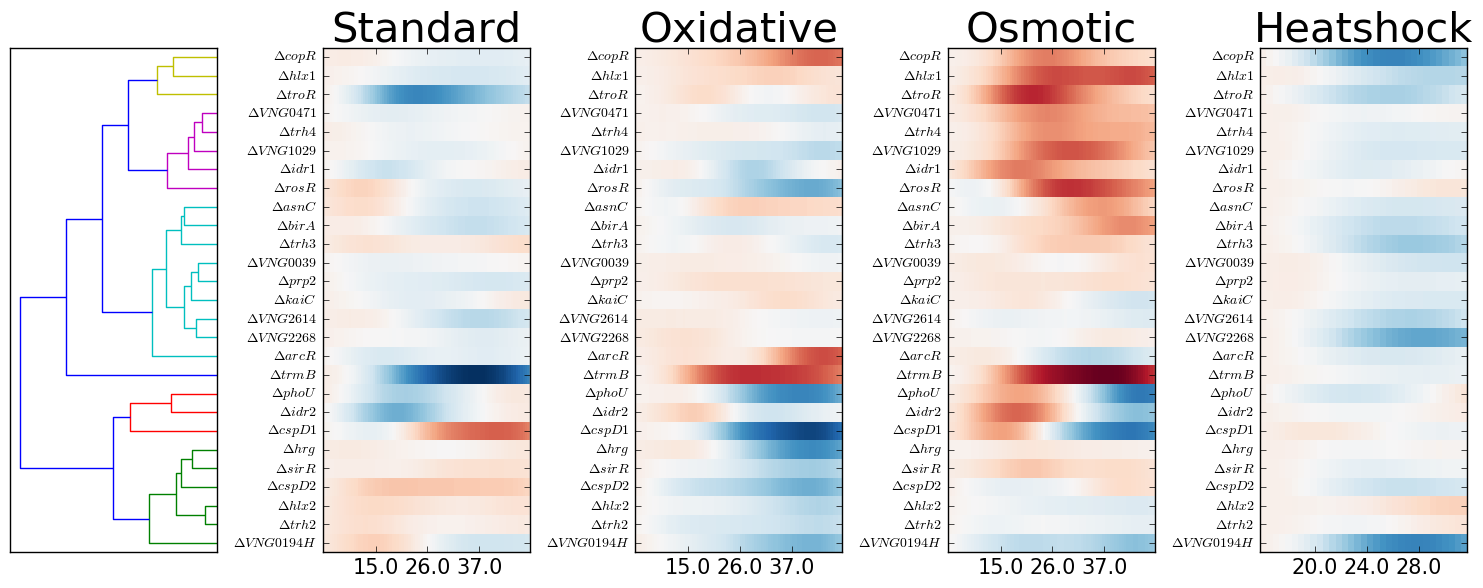

In [12]:
p = combined.shape[0]
l = linkage(combined,method='ward')
ind = leaves_list(l)
combined = combined[ind,:]
prob = prob[ind,:]
yticks = [yticks[i] for i in ind]

# combined[prob==0] = 0

vmin,vmax = combined.min(),combined.max()

# clusterShape=4
plt.figure(figsize=(18,6))
ax = plt.subplot2grid((1,6),(0,0),colspan=1,rowspan=1)
dendrogram(l,no_labels=True,orientation='left',ax=ax,color_threshold=6);
ax.set_xticks([]);

ax = plt.subplot2grid((1,6),(0,1),colspan=1,rowspan=1)

plt.imshow(combined[:,inds[0]:inds[1]],aspect='auto',cmap="RdBu_r",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')
# plt.imshow(unscale(combined[:,inds[0]:inds[1]],*standard[2]),aspect='auto',cmap="RdBu",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')

n=standard[0].shape[1]
i = np.arange(1.*n/4,n,1.*n/4)
plt.xticks(i,[standard[0].columns[j] for j in i],fontsize=15)
plt.title("Standard",fontsize=30)
plt.yticks(range(p),yticks)

ax = plt.subplot2grid((1,6),(0,2),colspan=1,rowspan=1)

plt.imshow(combined[:,inds[1]:inds[2]],aspect='auto',cmap="RdBu_r",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')
# plt.imshow(unscale(combined[:,inds[1]:inds[2]],*paraquat[2]),aspect='auto',cmap="RdBu",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')

n=paraquat[0].shape[1]
i = np.arange(1.*n/4,n,1.*n/4)
plt.xticks(i,[standard[0].columns[j] for j in i],fontsize=15)
plt.title("Oxidative",fontsize=30)
plt.yticks(range(p),yticks)

ax = plt.subplot2grid((1,6),(0,3),colspan=1,rowspan=1)

plt.imshow(combined[:,inds[2]:inds[3]],aspect='auto',cmap="RdBu_r",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')
# plt.imshow(unscale(combined[:,inds[2]:inds[3]],*osmotic[2]),aspect='auto',cmap="RdBu",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')

n=osmotic[0].shape[1]
i = np.arange(1.*n/4,n,1.*n/4)
plt.xticks(i,[standard[0].columns[j] for j in i],fontsize=15)
plt.title("Osmotic",fontsize=30)
plt.yticks(range(p),yticks)

ax = plt.subplot2grid((1,6),(0,4),colspan=1,rowspan=1)

plt.imshow(combined[:,inds[3]:],aspect='auto',cmap="RdBu_r",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')
# plt.imshow(unscale(combined[:,inds[3]:],*heatshock[2]),aspect='auto',cmap="RdBu",interpolation="none",vmin=vmin,vmax=vmax,origin='lower')

n=heatshock[0].shape[1]
i = np.arange(1.*n/4,n,1.*n/4)
plt.xticks(i,[heatshock[0].columns[j] for j in i],fontsize=15)
plt.title("Heatshock",fontsize=30)
plt.yticks(range(p),yticks)

plt.tight_layout()

plt.savefig(os.path.join('figures','oddelta-full.pdf'),bbox_inches='tight',dpi=300)